# COGS 118A - Final Project

# Cracking the Price Code: Predicting Mobile Phone Price Ranges

## Group members

- Junhui(Will) Wen
- Huiyi He
- Xinyi(Cindy) Wang
- Demi Mao
- Jiayi Zhu

# Abstract 
Mobile devices have become a central part of people’s everyday lives, so it is necessary for mobile companies to understand the needs and requirements of their customers. Thus, our primary objective is to predict the price range of mobile phones given some information about a mobile phone such as battery power, clock speed, and RAM. The data we found is collected from different mobile phone companies on Kaggle. Each observation records some basic information about a phone without directly telling its model.

We will do some data wrangling to remove null values, if there are some. Then, we will convert them to the right type for analysis. After that, we will perform exploratory data analysis to identify patterns and gain insights for modeling. Then we split the data into a training and testing set, select an appropriate machine learning algorithm and train on the training set. Finally, we deploy the model to make predictions on the test set. We will first measure the performance of our classifier by the accuracy/error rate. We also want to pay attention to the F1-score, which tells whether we have a balanced measure of precision and recall. 

# Background

Since the last decade, the telecommunication industry has experienced great revolutions as mobile devices have become part of people’s everyday lives. With about 100 million mobile phone sales per year, the success of the mobile industry is highly dependent on its consumers<a name="sell_data"></a>[<sup>[1]</sup>](#sell_data). Thus, the need and satisfaction of the user should be carefully considered when designing mobile devices and deciding the price. According to a publication of user experiences in mobile phones, by examining the correlation between several features and applying multiple regression, the size and color depth of the color screen, and the speed of webrosing of wireless connectivity are the one that is mostly related to the user satisfaction. The research paper also indicates that the presence of the camera does not affect the user's satisfaction level. However, since the study was conducted in 2006, and the technology for most camera phones were not mature enough at that time, the picture quality might be really bad, so the camera of the phone is not actually used by the user<a name="Ling"></a>[<sup>[3]</sup>](#Ling). However there is no recent research on the effectiveness of mobile phones on user preference. 

In addition to basic understanding of how the features of the mobile phone affect the user's choices, there are research papers focusing on classifying mobile phone prices based on four physical features of the mobile phone: random accessing memory, the power of the battery, and the width and height of px. Among all four machine learning algorithms: Support Vector Machines, Decision Tree, K-Nearest Neighbor, and Naive Bayes Classification. The Support Vector Machines have the highest performance based on the standard performance matrix of accuracy, precision, recall, and F1 score with and without feature selection<a name="Hu"></a>[<sup>[2]</sup>](#Hu), and the accuracy for SVM is 94.8 without feature selection and 97.7 with feature selection. In the same year 2022, another paper on classification on the price range of the mobile phone tested decision tree, random forest, and hybrid enable model of five different heterogeneous weak models was used and got respective results 85%, 91% and 96%. This provides us with some prior knowledge on algorithm selection and understanding <a name="Sakib"></a>[<sup>[4]</sup>](#Sakib).

# Problem Statement

The problem we aim to address is to accurately predict mobile phone price ranges (represented by 0 to 3, which refers to the low price level, median price level, high price level and very high price level according to the aveage pricing of the current market) based on product characteristics, including battery power, clock speed, and RAM. Since our dataset has multiple features, one potential solution is random forest. Our problem is quantifiable as the phone features in the dataset can be represented as numerical data points, and the price range can be categorized into several different classes, making the problem expressible in mathematical terms. Moreover, the problem is measurable. The accuracy serves as a clear metric to evaluate the model. Metrics such as accuracy, precision, recall, and the F1-score can be used to assess our predictions. Finally, our problem is replicable. Our problem is based on a dataset that contains diverse phone models from various companies. As long as we have necessary features of the mobile phone, we can apply our model to predict the price range.

# Data

The dataset we will be using for this task is accessible via the following link: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv
The dataset contains 21 variables, 1000 observations. Each observation contains information regarding the mobile phone's ID, battery power, Bluetooth capability, clock speed, dual SIM functionality, front camera megapixels (fc), 4G compatibility, internal memory, mobile depth (m_dep), mobile weight (mobile_wt), among other features.
Before applying our Random Forest model, we will perform a thorough data cleaning and transformation process. Initially, we will check for missing values and decide whether to remove or impute the corresponding rows or columns based on the extent and nature of these missing values. We will also handle any incorrect values or outliers present in the dataset, taking care to ensure that the integrity of the data is maintained.
Lastly, during the data transformation phase, we will examine the distribution of our data. If we find that our data is skewed, we might consider applying certain transformations, such as square root transformations, to create a more normally distributed dataset. 

Critical variables:
`battery_power`: total energy a battery can store in one time measured in mAh. This is an integer in range 500 to 1999
`blue`: has bluetooth or not. It’s represented by 1 (has bluetooth) or 0 (doesn’t have bluetooth)
`clock_speed`: speed at which a microprocessor executes instructions. This is a decimal number between 0.5 and 3
`dual_sim`: has dual sim support or not. It's represented by 1 (supports dual sim) and 0 (does not support dual sim).
`int_memory`: internal memory in gigabytes. It’s represented by an integer in range 2 to 64.

# Proposed Solution

We will split the whole dataset into a train and test set. Within the training set, we further take some proportion out for the purpose of validation. While training the model using Random Forest, we will use k-fold cross validation and gridsearch to find the best parameter in order to find the best parameter. Then, we evaluate the best model on the testing set by metrics like accuracy and F1-score. After this, we will finally do a feature importance analysis to see which features are most influential in determining the price range. 

This solution would work because random forest can handle a large number of complex features compared to simple models like SVM. Also, random forest is very robust to outliers and unimportant features, so it should be a very good algorithm for the given problem.

We will be comparing our model with the SVM model mentioned in the paper<a name="bg3"></a>[<sup>[3]</sup>](#bg3note).

# Evaluation Metrics

To evaluate the performance of our prediction model, we will look at the accuracy and F1 values. Accuracy will show us the correctly predicted instances’ proportion to the total number of instances. F1 reflects the balance between precision and recall. A larger F1 score indicates a good trade-off between precision and recall and also represents a higher overall performance of a classification model. 

To calculate them, we need the values of True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN). The formula for accuracy is (TP + TN) / (TP + TN + FP + FN). The formula for the F1 score is (2 * Precision * Recall) / (Precision + Recall), also known as (2 * TP) / (2TP + FP + FN). 

The reason we look at accuracy and F1 is that they provide complementary information about the predictor model’s performance to mobile phone price, which gives the mobile phone company insights to set prices for their products. 

Updated from proposal feadback:

In addition to the cofusion matrix of precision, recall, and F1, we will also add in the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) based on the differences between predicted values and actual values. Since there are 4 labels from 0 to 3 with different price range for the predicted result, differences between 0 and 1 in the real prices is smaller than differences between 0 to 3 in the real prices. Thus, we will also consider the RMSE and MAE to quantify how far away our prediction deviated from the real value. The formula of a RMSE = sqrt(sum(actual result - predicted result)^2 / number of samples), and the formula of MAE is abs(acutal result - predicted result)/ number of samples. Our ultimate goal is to find a model that minimize the RMSE and MAE as well as maintain a relatively low F1 score. 

# Results

### Subsection 1. Dataset Wrangling

In [59]:
# pip install graphviz
# brew install graphviz

In [1]:
# for Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For Training
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# for evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


There are total of 21 varaibles, with the first 20 varaibles representing the features of the mobile phones and the last varaible representing the label of the price range as explained in the data section. 

In [3]:
print(df.dtypes)

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object


In [4]:
# drop all rows with same values of features and with null value in any of the columns
df = df.drop_duplicates()
df = df.dropna()
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
# getting all the features names for the future use
feature_names = df.columns[:-1]

Given a dataset with roughly 20 features and an ordinal response variable, we can first eliminate some algorithms that are not suitable in this case. For example, since we cannot use binary classifiers such as logistic regression because the output is not binary. We also don't want to use decision trees because the data has a relatively high dimensions and decision trees are prone to overfitting.

Therefore, we want to use random forest, which can handle ordinal response variables by treating the problem as a multi-class classification task, and SVM, which can be used for ordinal classification by transforming the problem into multiple binary classification tasks (one-vs-one or one-vs-rest).

### Subsection 2. Training and Predicting

To train the data, we first split them into a training set and a test set. In the training set, we use a Grid Search Cross Validation to find the best hyper-parameter of Random Forest, which we then will use to predict the test set. Some of the hyper-parameters we choose are:

    - n_estimators: the number of trees in the forest
    - max_depth: the maximum depth of the tree
    - min_samples_split: the minimum number of samples required to split an internal node
    - max_features: the number of features to consider when looking for the best split

In [20]:
X = df.to_numpy()[:,:-1]
y = df.to_numpy()[:,-1]

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 7, 10],
    'max_features': ['sqrt', 'log2']
}

model = RandomForestClassifier(random_state=23)

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [22]:
results = pd.DataFrame(grid_search.cv_results_['params'] )
results['accuracy'] = grid_search.cv_results_['mean_test_score']
results

,max_depth,max_features,min_samples_split,n_estimators,accuracy
0,5,sqrt,5,50,0.815625
1,5,sqrt,5,100,0.825000
2,5,sqrt,5,150,0.833125
3,5,sqrt,7,50,0.813750
4,5,sqrt,7,100,0.826250
5,5,sqrt,7,150,0.831875
6,5,sqrt,10,50,0.816875
7,5,sqrt,10,100,0.830000
8,5,sqrt,10,150,0.837500
9,5,log2,5,50,0.815625


In [23]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# print the best prarameter
print("Best parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)

Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 150}
Accuracy: 0.87


Based on the explaination above, the best hyper-parameters for the random forest classifier based on the grid search is: the maximum depth of the tree is 15, the number is the features taking into account for each decision tree is the square root of all features which is approximatly sqrt(20), the minimum number of sample required to split the node further is 10, and the number of trees in the forest is 150. 

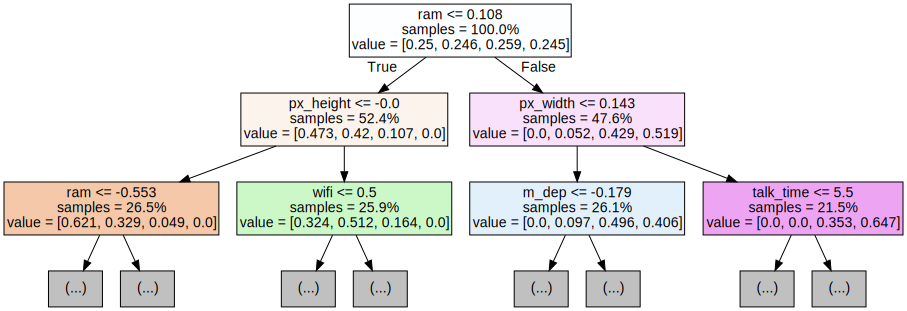

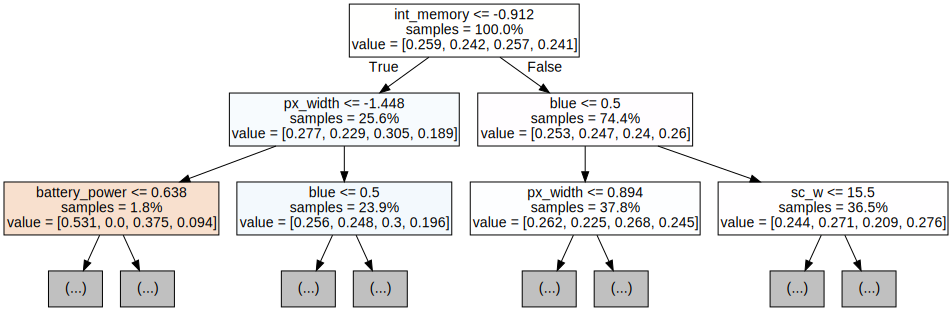

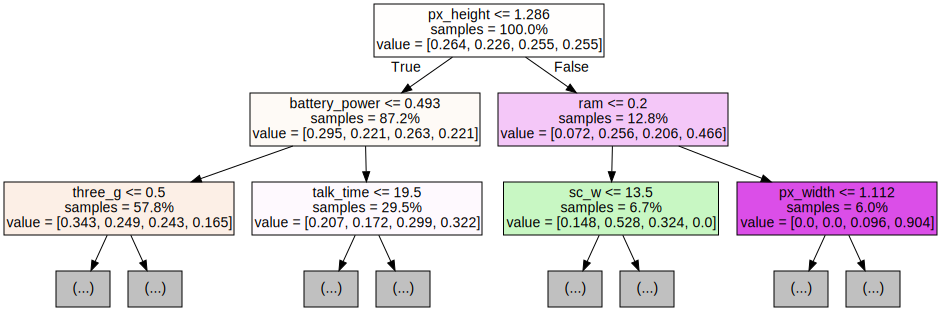

In [24]:
# visulizing the first 3 decision trees of the best_model
for i in range(3):
    tree = best_model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=feature_names,  
                               filled=True,
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

We also want to analysis the how important each features contribute to the overall performance of the random forest. The following two plots shows the calculated feature importances based on the mean decrease in impurity value and the decrease in the model score which is more rebust to the cardinality of the feature.

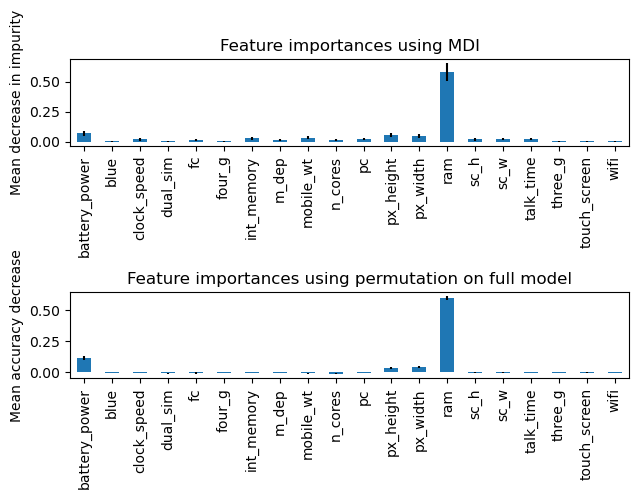

In [25]:
# Calculating the feature importances using impurity
importances = best_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)
forest_importances1 = pd.Series(importances, index=feature_names)

# Calculating the feature importances using permutation of features and overall model score
result = permutation_importance(
    best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
forest_importances2 = pd.Series(result.importances_mean, index=feature_names)
fig, axs = plt.subplots(2)

forest_importances1.plot.bar(yerr=std, ax=axs[0])
axs[0].set_title("Feature importances using MDI")
axs[0].set_ylabel("Mean decrease in impurity")

forest_importances2.plot.bar(yerr=result.importances_std, ax=axs[1])
axs[1].set_title("Feature importances using permutation on full model")
axs[1].set_ylabel("Mean accuracy decrease")

fig.tight_layout()

At this point, the most important features based on both plots are: 
1. random accessing memory, and 
2. battery_power. 

### Subsection 3. Normalization

Talk about why we normalize the dataset, and how does the result after normalization differ from before
At the first glance, it seems that the reason why the feature importances of RAM and battery power are high is that they are continuous variable with a wide range of values. To check whether this would indeed impact the training process, we want to normalize the data and then do a comparison.

In [26]:
scaler = StandardScaler()

cont_var = ['battery_power', 'ram', 'px_height', 'px_width', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt'] 
df[cont_var] = scaler.fit_transform(df[cont_var])
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,0,0.830779,0,-0.762495,0,-1.380644,0.340740,1.349249,2,...,-1.408949,-1.146784,0.391703,9,7,19,0,0,1,1
1,-0.495139,1,-1.253064,1,-0.992890,1,1.155024,0.687548,-0.120059,3,...,0.585778,1.704465,0.467317,17,3,7,1,1,0,2
2,-1.537686,1,-1.253064,1,-0.532099,1,0.493546,1.381165,0.134244,5,...,1.392684,1.074968,0.441498,11,2,9,1,1,0,2
3,-1.419319,1,1.198517,0,-0.992890,0,-1.215274,1.034357,-0.261339,6,...,1.286750,1.236971,0.594569,16,8,11,1,0,0,2
4,1.325906,1,-0.395011,0,2.002254,1,0.658915,0.340740,0.021220,2,...,1.268718,-0.091452,-0.657666,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1,-1.253064,1,-0.992890,1,-1.656260,1.034357,-0.967737,6,...,1.300273,1.477661,-1.342799,13,4,19,1,1,0,0
1996,1.653694,1,1.321096,1,-0.992890,0,0.383299,-1.046495,1.320993,4,...,0.608317,1.651235,-0.085031,11,10,16,1,1,1,2
1997,1.530773,0,-0.762748,1,-0.762495,1,0.217930,0.687548,-0.911225,8,...,0.502383,0.880565,0.860139,9,1,5,1,1,0,3
1998,0.622527,0,-0.762748,0,-0.071307,1,0.769162,-1.393304,0.134244,5,...,-0.696707,-1.345816,-1.157454,18,10,19,1,1,1,0


In [27]:
X_transformed = df.to_numpy()[:,:-1]

# Split the dataset into train and test sets
X_train_transformed, X_test_transformed, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=23)

In [28]:
model_tranformed = RandomForestClassifier(random_state=23)

grid_search_transformed = GridSearchCV(model_tranformed, param_grid, cv=5)
grid_search_transformed.fit(X_train_transformed, y_train)

best_model_transformed = grid_search_transformed.best_estimator_

In [29]:
y_pred_transformed = best_model_transformed.predict(X_test_transformed)
accuracy_transformed = accuracy_score(y_test, y_pred_transformed)

# print the best prarameter
print("Best parameters:", grid_search_transformed.best_params_)
print("Accuracy:", accuracy_transformed)

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.8875


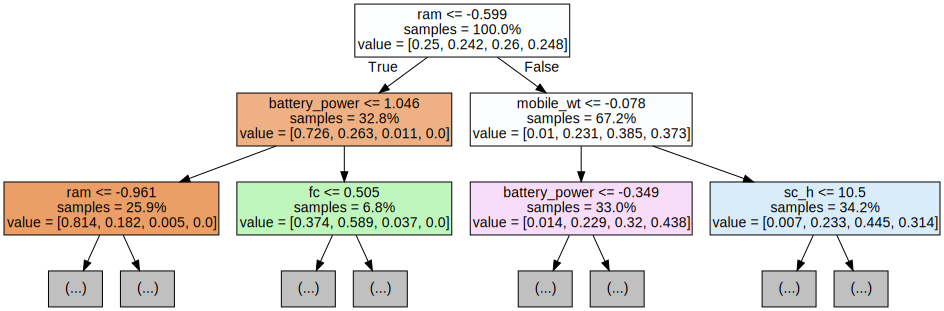

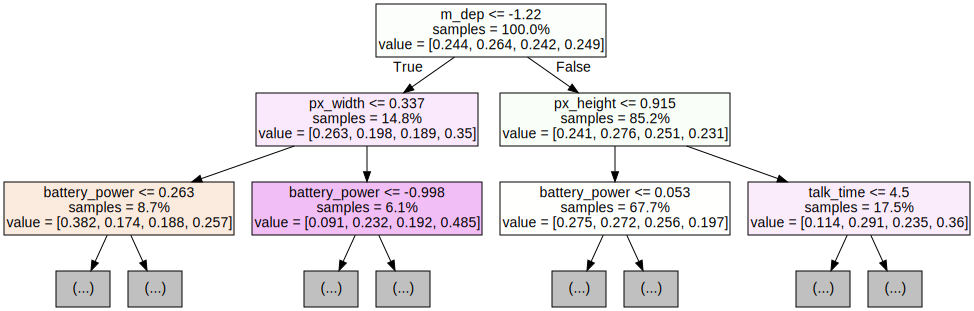

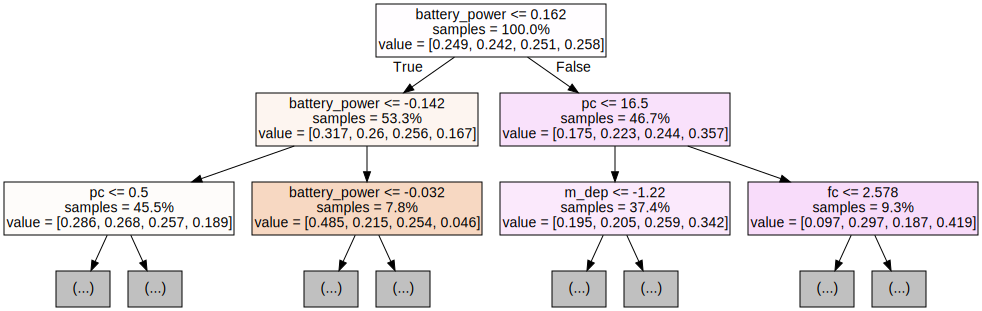

In [30]:
# visulizing the first 3 decision trees of the best_model
for i in range(3):
    tree = best_model_transformed.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=feature_names,  
                               filled=True,
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

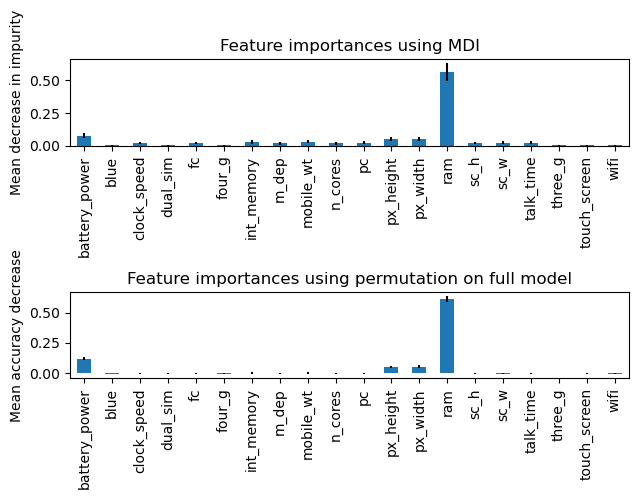

In [31]:
# Calculating the feature importances using impurity
importances = best_model_transformed.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model_transformed.estimators_], axis=0)
forest_importances1 = pd.Series(importances, index=feature_names)

# Calculating the feature importances using permutation of features and overall model score
result = permutation_importance(
    best_model_transformed, X_test_transformed, y_test, n_repeats=10, random_state=42, n_jobs=2
)
forest_importances2 = pd.Series(result.importances_mean, index=feature_names)
fig, axs = plt.subplots(2)

forest_importances1.plot.bar(yerr=std, ax=axs[0])
axs[0].set_title("Feature importances using MDI")
axs[0].set_ylabel("Mean decrease in impurity")

forest_importances2.plot.bar(yerr=result.importances_std, ax=axs[1])
axs[1].set_title("Feature importances using permutation on full model")
axs[1].set_ylabel("Mean accuracy decrease")

fig.tight_layout()

In [32]:
best_model_transformed.feature_importances_

array([0.07709516, 0.00482088, 0.02120285, 0.00504778, 0.01920109,
       0.00447393, 0.03112981, 0.01830901, 0.03218853, 0.01787473,
       0.02212093, 0.04946033, 0.05492943, 0.56205287, 0.02096119,
       0.02271276, 0.02428705, 0.00373077, 0.00445444, 0.00394646])

In [33]:
best_model.feature_importances_

array([0.07002651, 0.00354031, 0.02028541, 0.00389183, 0.01843509,
       0.00370827, 0.02802168, 0.01672269, 0.03345937, 0.01720065,
       0.02191593, 0.0539827 , 0.05155758, 0.58210888, 0.02000829,
       0.02005596, 0.02335917, 0.00358663, 0.00441694, 0.00371611])

After normalizing some of the large continuous variables, we observed that although the values of these features' importance change slightly compared to the raw values, RAM is still the most important feature, followed by the battery power, which in a sense suggests that they are the most important features in predicting the price range of a phone.

### Subsection 4. Measure Benchmark Performance

For Random Forest:
For label 0:
TP=94, TN=294, FP=9, FN=3
Accuracy=0.97, f1=0.94

For label 1:
TP=73, TN=291, FP=14, FN=22
Accuracy=0.91, f1=0.8021978021978021

For label 2:
TP=89, TN=278, FP=17, FN=16
Accuracy=0.9175, f1=0.8436018957345972

For label 3:
TP=99, TN=292, FP=5, FN=4
Accuracy=0.9775, f1=0.9565217391304348

overall Accuracy=0.94375, Overall f1=0.8855803592657085

The mean absolute error is: 0.11
The RMSE is: 0.34


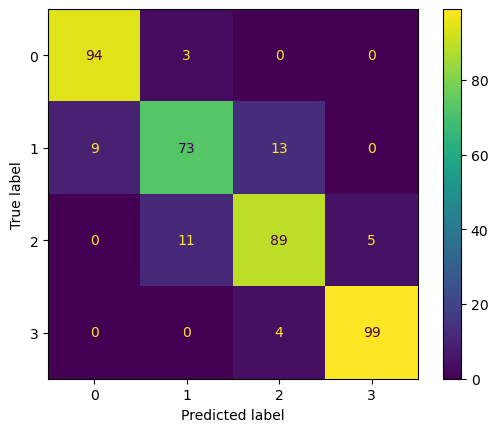

In [34]:
## evaluation for Random Forest
print('For Random Forest:')

predictions = best_model_transformed.predict(X_test_transformed)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# To display the confusion matrix
disp.plot()  

def calculate_metrics(cm):
    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    recall = TP / (TP + FN)
    specificity = TN / (TN + FP)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    f1 =  (2 * precision * recall) / (precision + recall)

    return TP, TN, FP, FN, accuracy, f1

TP, TN, FP, FN, accuracy, f1 = calculate_metrics(cm)

# Adjust according to the number of classes
for i in range(4):
    print(f'For label {i}:')
    print(f'TP={TP[i]}, TN={TN[i]}, FP={FP[i]}, FN={FN[i]}')
    print(f'Accuracy={accuracy[i]}, f1={f1[i]}\n')
print(f'overall Accuracy={(accuracy.sum()/len(accuracy))}, Overall f1={f1.sum()/len(f1)}\n')

mae = mean_absolute_error(y_test,predictions)
print("The mean absolute error is: {:.2f}".format(mae))
rmse = mean_squared_error(y_test, predictions, squared=False)
print("The RMSE is: {:.2f}".format(rmse))

### Subsection 5. Measure Benchmark Performance

As mentioned before, we want to compare the best model we got with the benchmark model, which is SVM.

In [35]:
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf','poly','sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [3, 5, 8, 10]
}

svm_model = SVC(random_state=42)

grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5)
grid_search_svm.fit(X_train_transformed, y_train)

best_svm_model = grid_search_svm.best_estimator_


In [36]:
results_SVM = pd.DataFrame(grid_search_svm.cv_results_['params'] )
results_SVM['accuracy'] = grid_search_svm.cv_results_['mean_test_score']
results_SVM

,C,degree,gamma,kernel,accuracy
0,0.01,3,scale,linear,0.906250
1,0.01,3,scale,rbf,0.253125
2,0.01,3,scale,poly,0.256250
3,0.01,3,scale,sigmoid,0.253125
4,0.01,3,auto,linear,0.906250
...,...,...,...,...,...
123,10.00,10,scale,sigmoid,0.275625
124,10.00,10,auto,linear,0.958750
125,10.00,10,auto,rbf,0.493750
126,10.00,10,auto,poly,0.693125


In [37]:
y_pred_svm = best_svm_model.predict(X_test_transformed)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# print the best prarameter
print("Best parameters:", grid_search_svm.best_params_)
print("Accuracy:", accuracy_svm)

Best parameters: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.9675


For Support Vector machine:
For label 0:
TP=95, TN=298, FP=5, FN=2
Accuracy=0.9825, f1=0.9644670050761421

For label 1:
TP=86, TN=303, FP=2, FN=9
Accuracy=0.9725, f1=0.9398907103825138

For label 2:
TP=104, TN=290, FP=5, FN=1
Accuracy=0.985, f1=0.9719626168224299

For label 3:
TP=102, TN=296, FP=1, FN=1
Accuracy=0.995, f1=0.9902912621359223

overall Accuracy=0.98375, Overall f1=0.9666528986042521

The mean absolute error is: 0.03
The RMSE is: 0.18


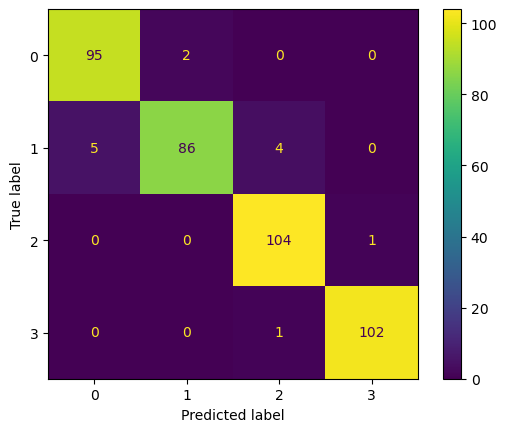

In [38]:
## evaluation for SVM

print('For Support Vector machine:')

predictions_svm = best_svm_model.predict(X_test_transformed)
cm_svm = confusion_matrix(y_test, predictions_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)

# To display the confusion matrix
disp_svm.plot()  

TP, TN, FP, FN, accuracy, f1 = calculate_metrics(cm_svm)

# Adjust according to the number of classes
for i in range(4):
    print(f'For label {i}:')
    print(f'TP={TP[i]}, TN={TN[i]}, FP={FP[i]}, FN={FN[i]}')
    print(f'Accuracy={accuracy[i]}, f1={f1[i]}\n')
print(f'overall Accuracy={(accuracy.sum()/len(accuracy))}, Overall f1={f1.sum()/len(f1)}\n')

mae = mean_absolute_error(y_test,predictions_svm)
print("The mean absolute error is: {:.2f}".format(mae))
rmse = mean_squared_error(y_test, predictions_svm, squared=False)
print("The RMSE is: {:.2f}".format(rmse))

### Discussion

### Interpreting the result

#### Main point: SVM vs RF

Classification has accuracy higher than 90% using random forest, main determining features on price range is random accessing memory, battery power, etc. 

Interpretation of Random forest
We decided to use the Random Forest (RF) as our algorithm to do price range prediction here. As can be seen above, our prediction’s accuracy is 88.75%. We visualized three decision trees from the best random forest model here. Next, we got the most influential features of mobile phones by impurity and permutations. Impurity tells us the feature's importance indirectly. By looking at impurities at different nodes, we would know how important the features contribute to reducing the error within the data. Permutation feature importance is to calculate the decrease in model performance when we randomly shuffle certain features. We created two plots and it is obvious that RAM (Random Access Memory) and battery power are the most important features to affect the mobile phones’ price. 

Interpretation of SVM and Comparison it with Random Forest
After using the RF algorithm, we decided to use Support Vector Machine(SVM) to compare the performance to RF. We used Grid-search Cross Validation to get the best hyper-parameter. By using the best hyperparameter for the SVM, our prediction’s accuracy is 96.75%. This result is higher than Random Forest, which is opposite to what we expected at first. We believe there are several reasons behind it. Firstly, SVM is more effective in handling the non-linearly by using kernel functions while Random forest may struggle with complex non-linearly relationships. Secondly, SVM are less likely to be influenced by the outliers since it is only determined by the support vectors while Random Forest is sensitive to the outliers, which is easier to be affected. More importantly, since our dataset is not that large, SVM performs better in the case of a smaller dataset while Random Forest is better with a large number of dataset. 

#### Secondary Point 1: RF is Robust to Unscaled/Unnormalized Data

When calculating the feature importance of the original dataset, we noticed that RAM and battery power are much higher than other features. We were curious whether this has to do with the fact that these variables are unnormalized, for the two most important features are large continuous variables. After normalizing the dataset, we found that there is not much difference in the feature importance scores, which actually makes sense because we learned in class that RF is robust to unnormalized data.

#### Secondary Point 2:  F1 score 

Since there is no preference for minimizing false positive or false negative values, we used f1, which is a combination of precision and recall which takes into account both false positive and false negative rates of the model, to evaluate our models. Based on the individual f1 value of each label of each model:

- RF: label 0, 1, 2, 3 have corresponding f1 scores of 94, 80, 84, 96 and average: 89
- SVM: label 0, 1, 2, 3 have corresponding f1 scores of 96, 94, 97, 99 and average: 97

We noticed the SVM model has provided a more balanced and superior performance across all cases. The RF model has f1 score ranges from 80 to 96, indicating some variability in the performance, and it has lower performance in labels 1 and 2, suggesting that the model may struggle with these particular classes. On the other hand, SVM exhibits a consistently high f1 score across all classes, indicating the model performs exceptionally well on this dataset, which points to a more robust model performance. 

#### Secondary Point 3:  Root mean square error

In addition to F1 score, we also consider Mean absolute error and root mean squared error to evaluate the performance of the model since our labels still reflect some orders. Mean absolute error weighs all individual differences equally and is more robust to outliers or large differences. However, since we want to penalize larger differences between our predicted value and the actual value of our label, we are going to use RMSE as the primary evaluation on the performance. Same as the result of f1 score, SVM outperforms random forest on minimizing the RMSE error (0.18 compare with 0.34). 


### Limitations

If we had more data, the model would have access to a more diverse training set and increase the possibility to capture variations in the dataset. It will improve the accuracy of the prediction in general. The model will become more robust to handle more complicated testing sets. 
The interpretability of SVM is challenging. Unlike random forests where we can visualize the branches and trace the path, SVM is mathematically more complex in that it creates a hyperplane to separate the data and applies the kernel trick, and thus harder to visualize and interpret. 
Since our dataset is not that big, we cannot guarantee that the current best hyper-parameter from grid searching is the optimal one. The optimal hyper-parameter may overfit to the noise of our dataset, which could lead to poor performance on unseen data.
While we attempted to mitigate the influence of these issues as small as possible, future work could focus on a bigger, more diverse dataset. If time permits, we could also explore more evaluation metrics and do further analysis and comparison of models to get a more comprehensive understanding of the dataset.

### Ethics & Privacy

Our project is done in a legal way, and our project will be used academically. Based on that, we acknowledge that there might be ethical and privacy issues in the project. We will consider all the possible concerns in the following paragraph.
Our project dataset contained various mobile phones’ features including specific internal hardware and external structures, which are collected from different model phone companies on Kaggle.
We understand that bias is an important consideration in our project as it can significantly impact the accuracy and fairness of the results. For example, the dataset might be collected over a specific time period, and the price of mobile phones is changeable over time because of technological advancements, economic conditions, and market trends. It is possible to ignore the price fluctuations which will cause the predictions not accurate to reflect the current price. Also, with the development of technology, the model phones’ functions get complicated. The features in our dataset might not contain all possible features. To mitigate those biases, we could use certain ways to process the dataset such as removing the outliers, handling missing values, and standardizing features. By performing a comprehensive analysis of the dataset, we could identify the potential bias. Also, it’s useful to do feature selection to avoid considering attributes that are at risk of bias.

### Conclusion

Different from the proposed solution, our prediction result is that SVM has a higher average accuracy for predicting the price range. In conclusion, we saw that Random Forest has decent performance for the given dataset, with an accuracy score of about 90%, but this is relatively lower than the performance of SVM, whose accuracy is almost perfect. However, this does not necessarily suggest that SVM would always perform better than Random Forest. The choices of our hyper-parameters in the GridSearchCV method might have some effects on the final prediction score. If we can run the GridSearch more times with different parameters, then we might see some different scores. 

# Footnotes
<a name="sell_data"></a>1.[^](#sell_data): Mobile phone statistics 2023. Mobile Phone Statistics 2023. (n.d.). https://www.sellcell.com/mobile-phone-statistics/#sources-and-media-contacts<br> 
<a name="Hu"></a>3.[^](#Hu): Hu, N. (2022). Classification of Mobile Phone Price dataset using machine learning algorithms. 2022 3rd International Conference on Pattern Recognition and Machine Learning (PRML). https://doi.org/10.1109/prml56267.2022.9882236<br>
<a name="Ling"></a>2.[^](#Ling): ALing, C., Hwang, W., &amp; Salvendy, G. (2006). Diversified users’ satisfaction with advanced mobile phone features. Universal Access in the Information Society, 5(2), 239–249. https://doi.org/10.1007/s10209-006-0028-x<br>
<a name="Sakib"></a>4.[^](#Sakib): Sakib, A. H., Shakir, A. K., Sutradhar, S., Saleh, MD. A., Akram, W., &amp; Biplop, K. B. (2022). A hybrid model for predicting mobile price range using machine learning techniques. 2022 The 8th International Conference on Computing and Data Engineering. https://doi.org/10.1145/3512850.3512860 
